In [1]:
import random
#import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import csv
from pgmpy.readwrite import BIFReader
import time
from itertools import combinations
import statistics
import bnlearn as bn
from pgmpy.metrics import structure_score
from pgmpy.models import BayesianNetwork
import gc
from utils import *
from ga_operators import *
from loaders import *
import matplotlib.pyplot as plt

In [2]:
asia = load_asia_data(sample_size=1000)
nodes = asia.columns
nodes = list(nodes)

In [4]:
child = load_child_data(sample_size=100)
nodes_child = child.columns
nodes_child = list(nodes_child)

In [5]:
asia.head()

S  L  A  T  E  X  B  D
1165  1  0  0  0  0  0  1  1
569   1  0  0  0  0  0  0  0
6960  1  0  0  0  0  0  0  0
402   0  0  0  0  0  0  1  1
2146  0  0  0  0  0  0  0  0

In [6]:
gt_adj, node2idx, idx2node = load_gt_adj_asia()

In [7]:
node2idx

{'S': 0, 'L': 1, 'A': 2, 'T': 3, 'E': 4, 'X': 5, 'B': 6, 'D': 7}

In [8]:
gt_adj

array([[0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
scores = [10,3,5,1,100,8,20,15]
rank = np.argsort(scores)
best_n = rank[:4]
best_n

array([3, 1, 2, 5])

In [ ]:
#pop = create_population(10, nodes, asia, feasible_only=True)
pop = create_population(100, nodes_child, child, feasible_only=True)

51


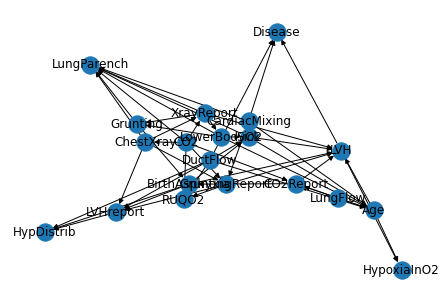

59


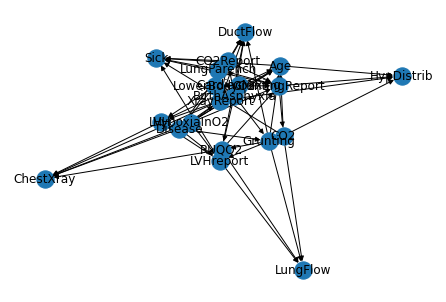

76


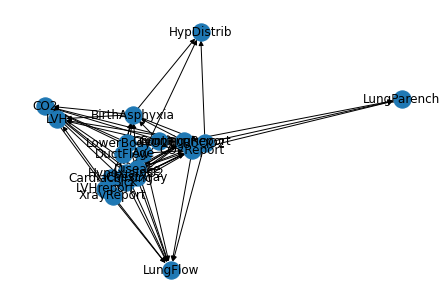

55


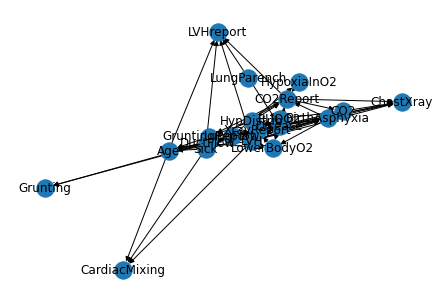

46


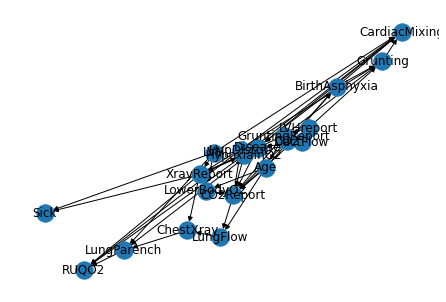

37


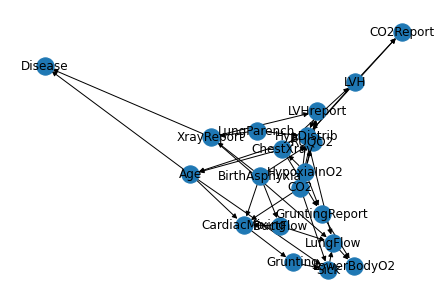

67


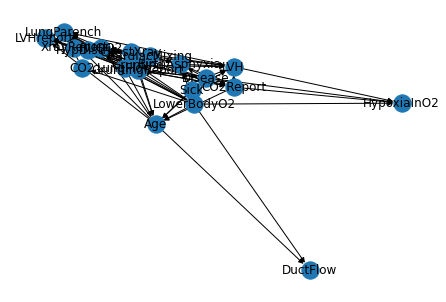

32


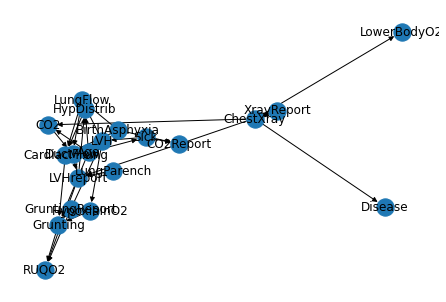

41


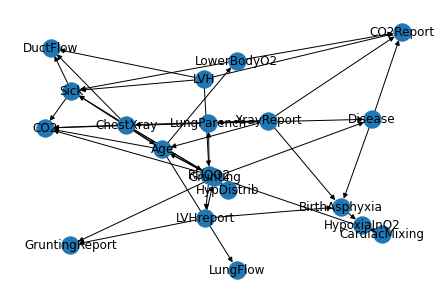

44


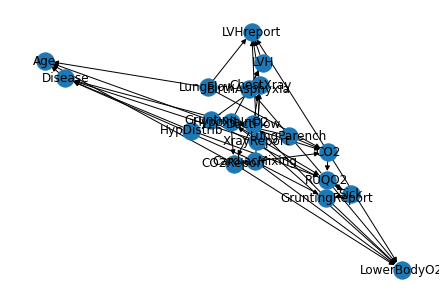

52


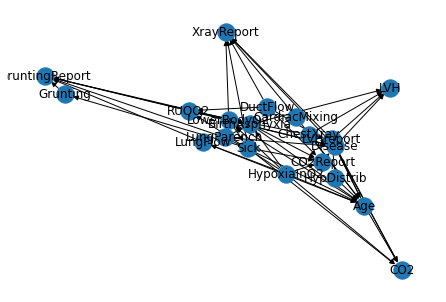

64


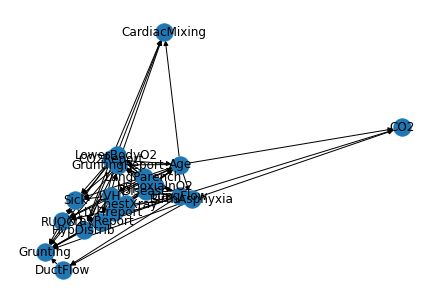

50


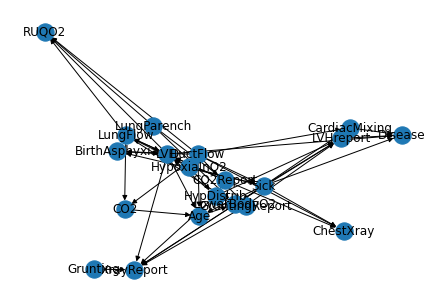

70


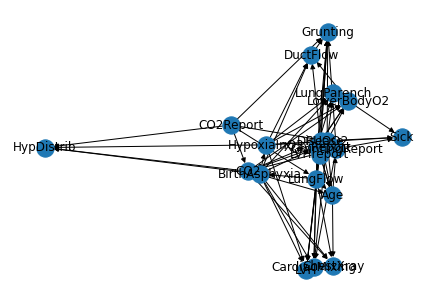

31


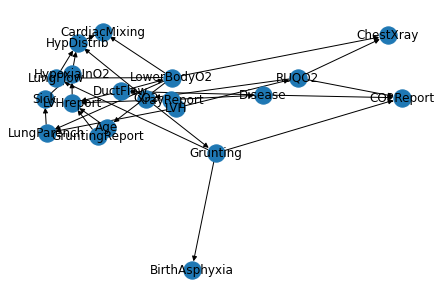

55


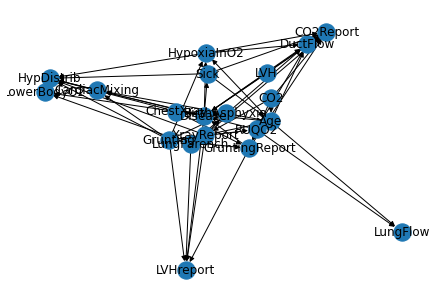

35


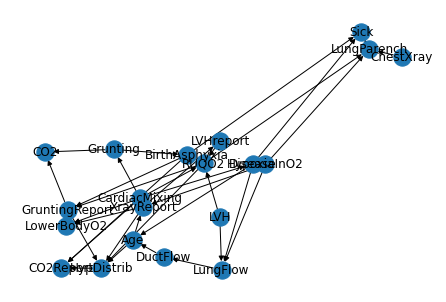

61


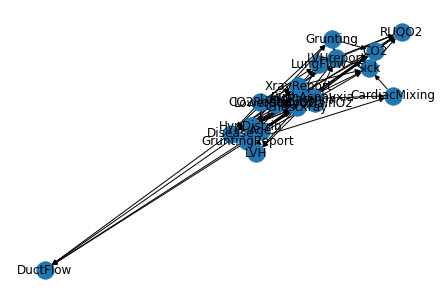

54


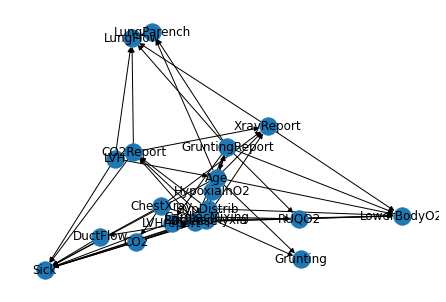

61


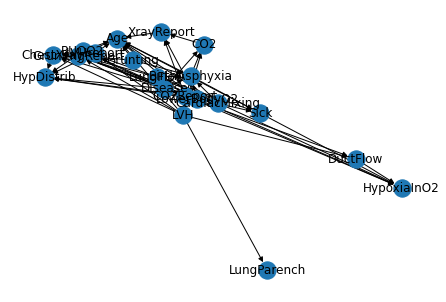

65


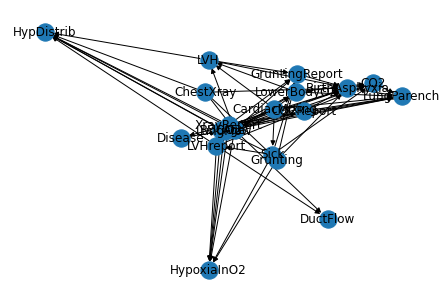

80


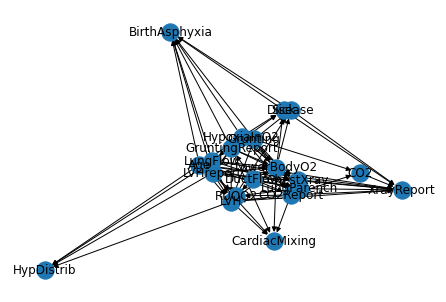

50


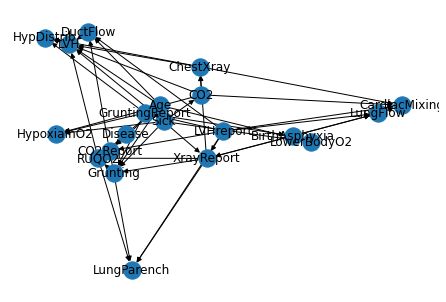

55


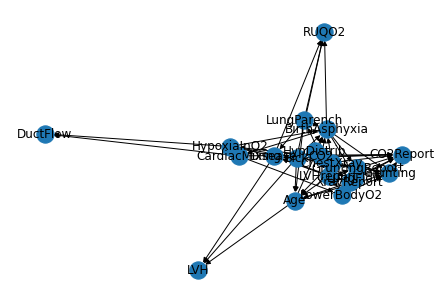

66


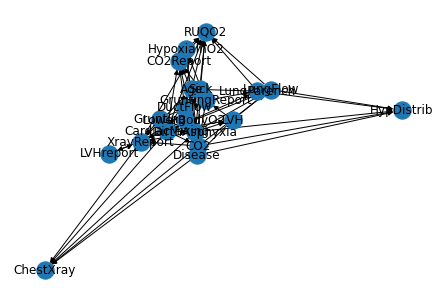

37


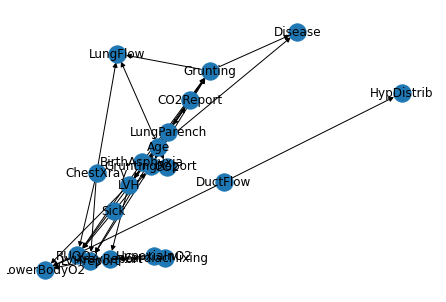

35


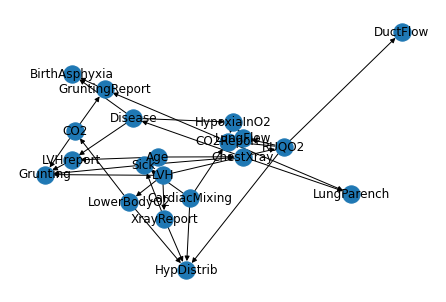

52


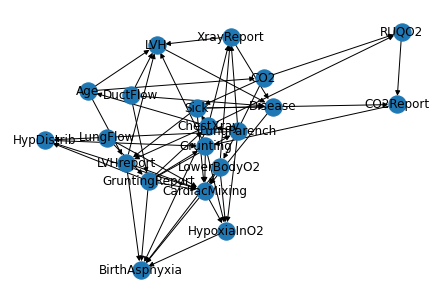

65


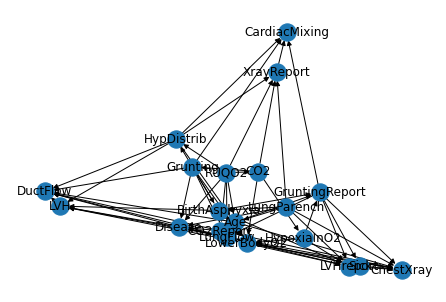

57


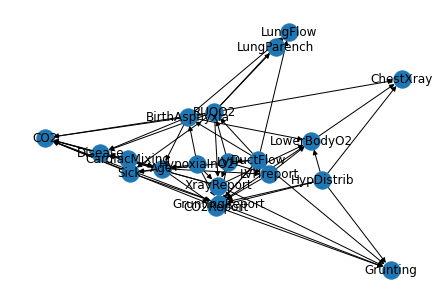

30


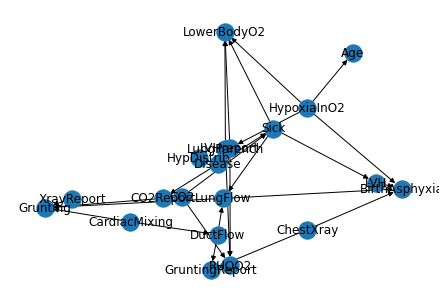

47


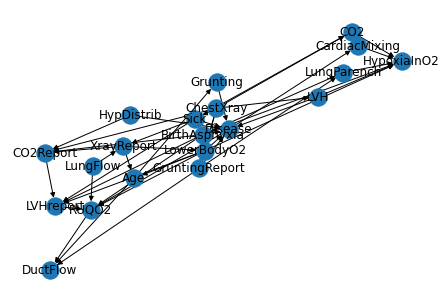

53


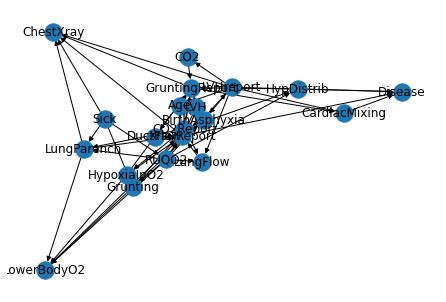

48


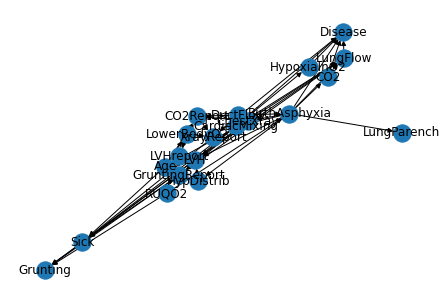

57


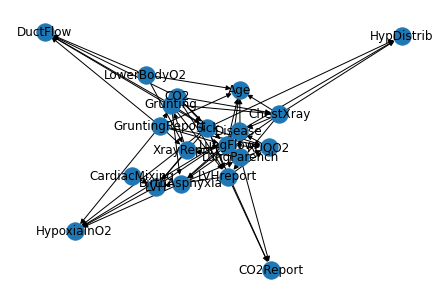

32


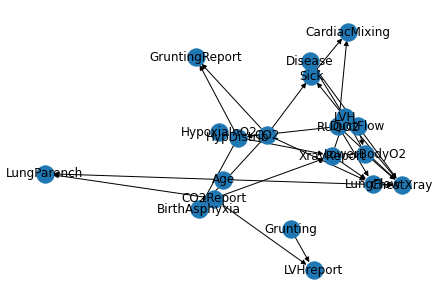

53


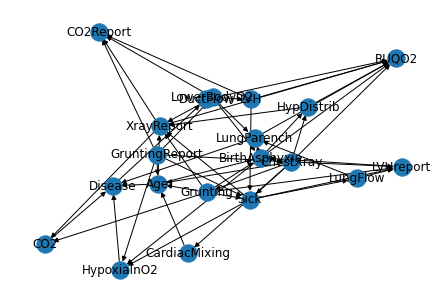

55


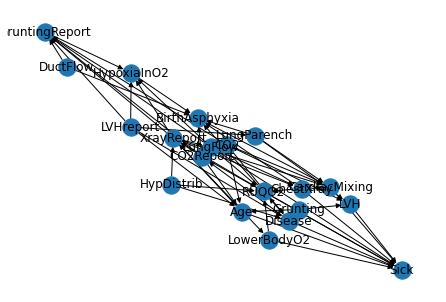

34


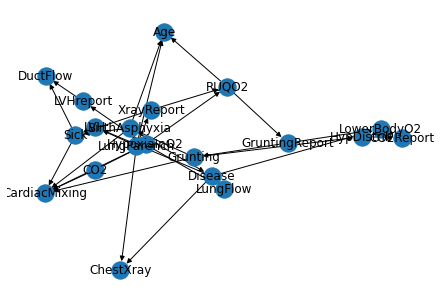

48


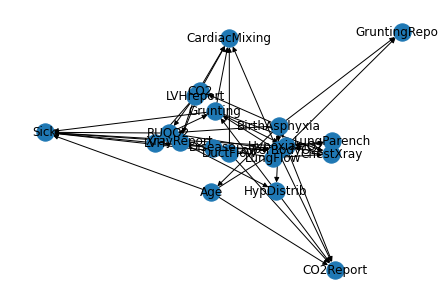

62


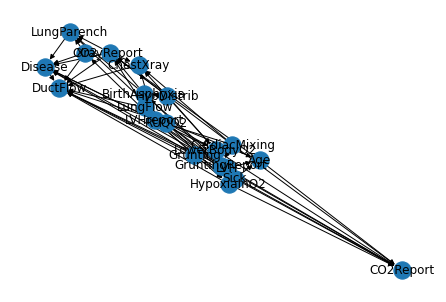

31


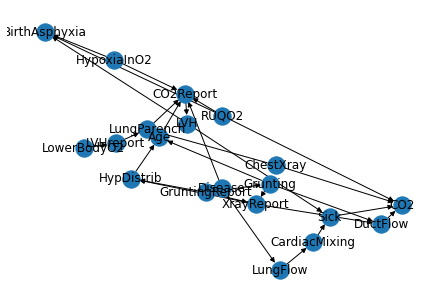

40


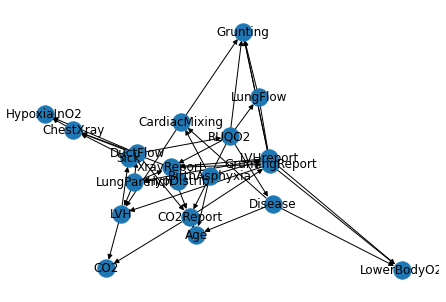

48


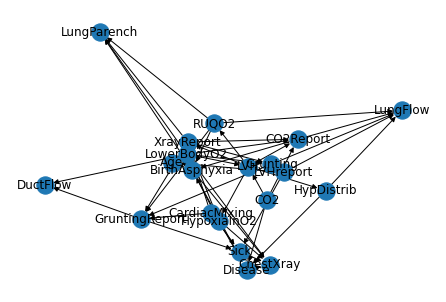

55


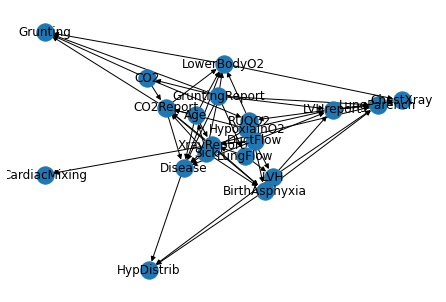

35


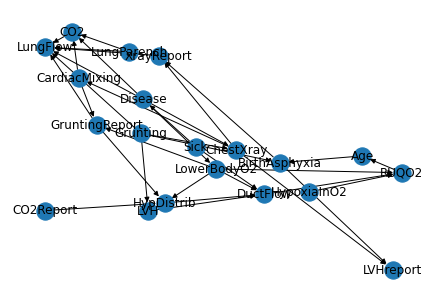

56


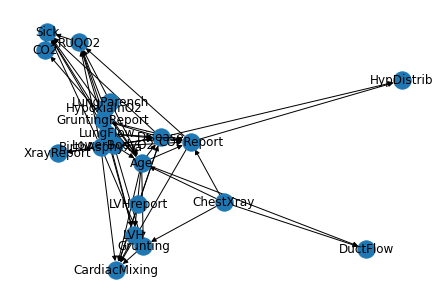

39


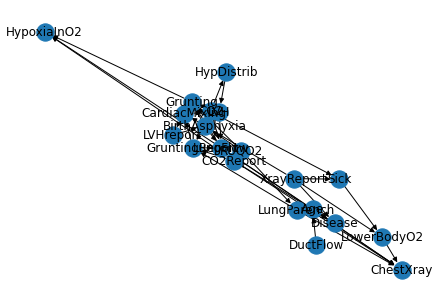

35


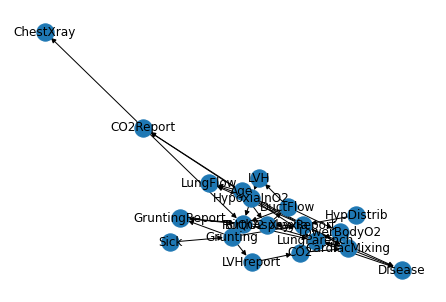

40


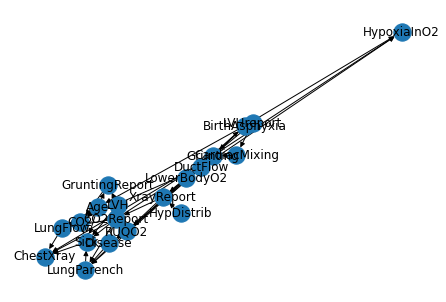

57


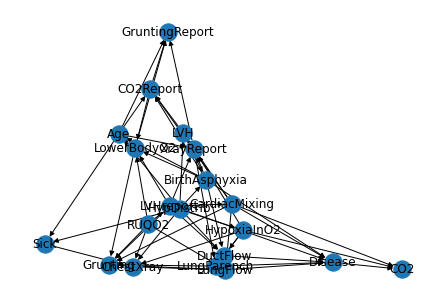

53


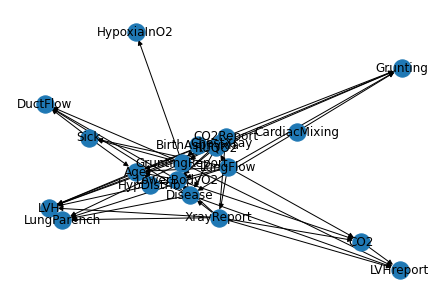

63


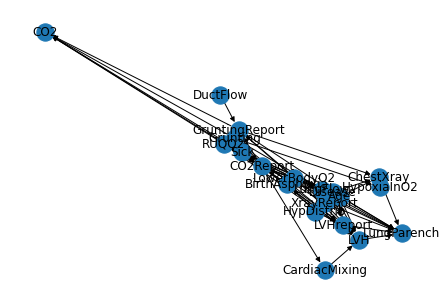

34


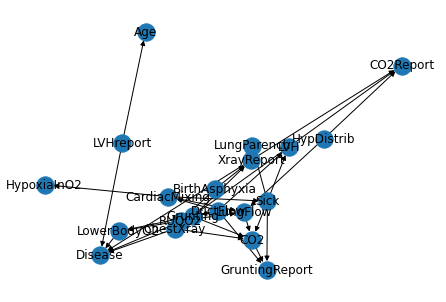

54


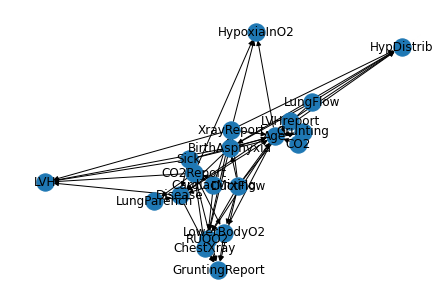

64


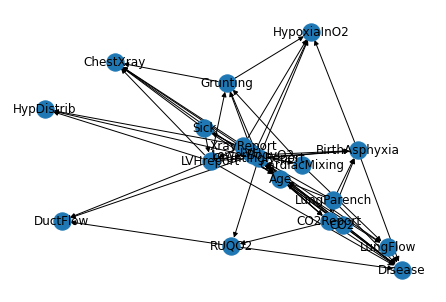

49


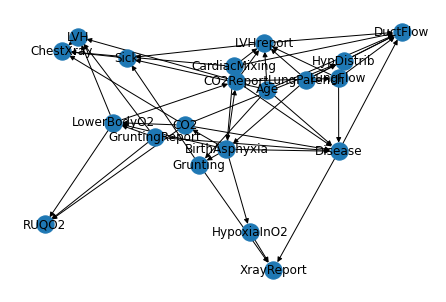

82


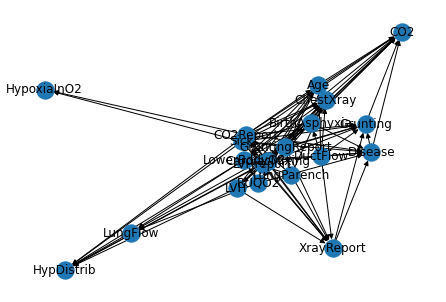

50


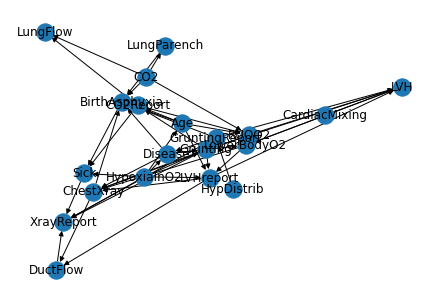

30


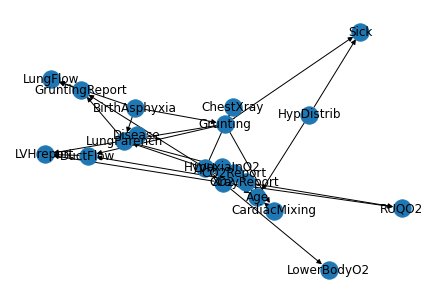

64


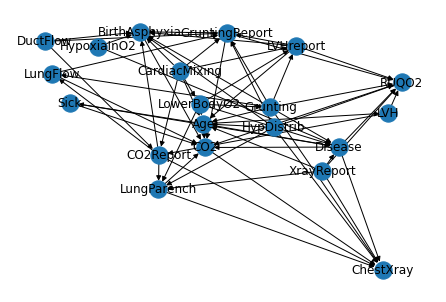

66


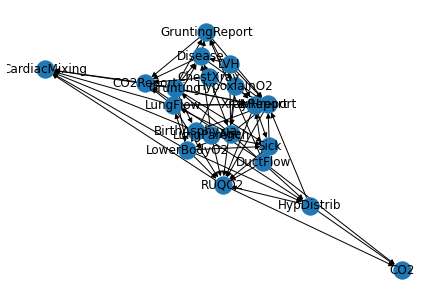

70


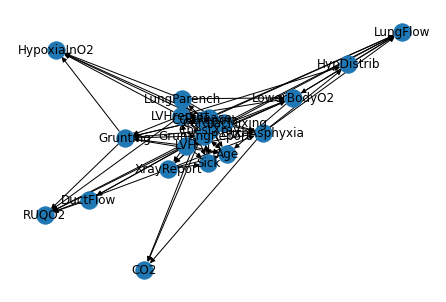

52


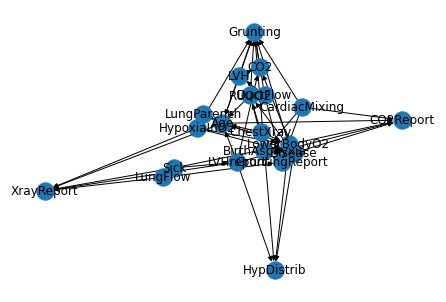

62


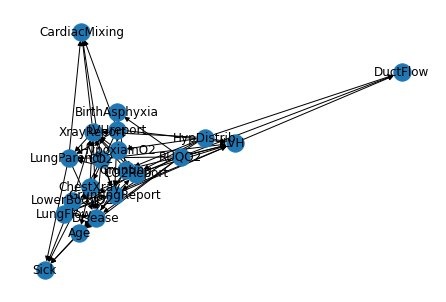

65


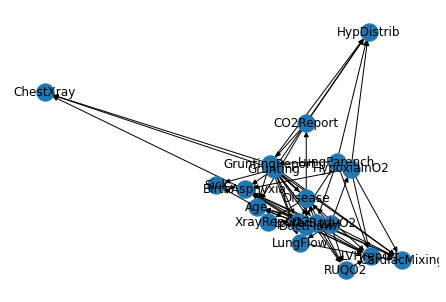

49


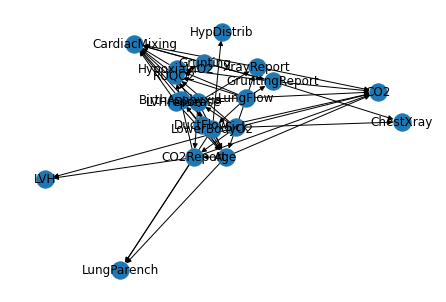

53


KeyboardInterrupt: 

In [5]:
# create a figure for each individual
for ind in pop:
    #print(ind.compute_bic(asia))
    digraph = ind.individual_to_digraph()
    print(digraph.number_of_edges())
    # create a new figure
    plt.figure()
    # plot the DAG
    nx.draw(digraph, with_labels=True, arrows=True)
    # show the figure
    plt.show()


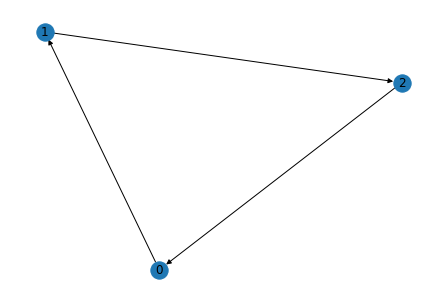

In [13]:
G = nx.DiGraph([(0, 1), (2, 0), (1, 2)])
# draw
nx.draw(G, with_labels=True, arrows=True)

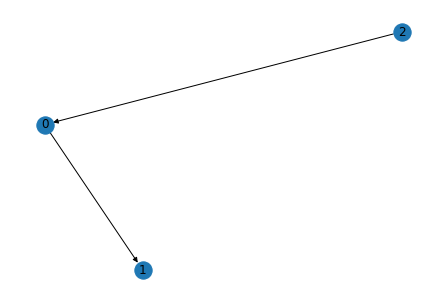

In [14]:
while not nx.is_directed_acyclic_graph(G):
    cycle = nx.find_cycle(G)
    edge = random.choice(cycle)
    G.remove_edge(edge[0], edge[1])
# draw
nx.draw(G, with_labels=True, arrows=True)


In [22]:
G=nx.gnp_random_graph(20,0.1,directed=True)
G = break_cycles(G)
nx.is_directed_acyclic_graph(G)

graph is still cyclic, listing cycles
selecting a random cycle
removing edge from cycle
graph is still cyclic, listing cycles
selecting a random cycle
removing edge from cycle
graph is still cyclic, listing cycles
selecting a random cycle
removing edge from cycle
graph is still cyclic, listing cycles
selecting a random cycle
removing edge from cycle
graph is still cyclic, listing cycles
selecting a random cycle
removing edge from cycle


True

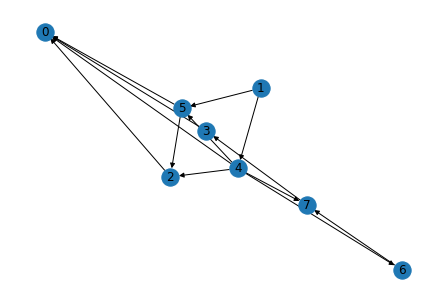

In [14]:
#show DAG
nx.draw(G, with_labels=True, arrows=True)

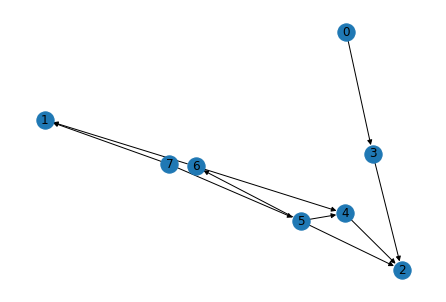

In [13]:
G = fix_disconnected_graph(G)
nx.draw(G, with_labels=True, arrows=True)

In [14]:
G.number_of_edges()

10

In [15]:
M = nx.adjacency_matrix(G).todense().flatten().tolist()
print(M)
# sum True values
sum(M)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]


10

In [16]:
individual = Individual([], nodes)
sparsity = 0.4
individual.init_random(num_nodes = len(nodes), sparsity = sparsity)

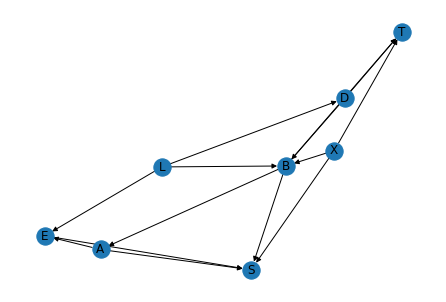

In [17]:
# Draw the individual
digraph1 = individual.individual_to_digraph()
nx.draw(digraph1, with_labels=True, arrows=True)

In [18]:
#mutated_ind = individual.uniform_mutation(0.1, True)
mutated_ind = mutation(individual, feasible_only=True)

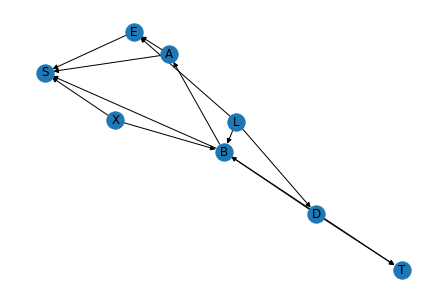

In [19]:
# Draw the mutated individual
mutated_digraph = individual.individual_to_digraph()
nx.draw(mutated_digraph, with_labels=True, arrows=True)

# Leitura de CHILD

In [20]:
break here

SyntaxError: invalid syntax (<ipython-input-20-3ef470a3d0aa>, line 1)

In [ ]:
model = bn.import_DAG('../data/child.bif',  CPD=False)

[bnlearn] >Import <../data/child.bif>
[bnlearn] >Loading bif file <../data/child.bif>


In [ ]:
model['adjmat']

target          DuctFlow  HypDistrib  CardiacMixing  HypoxiaInO2  LungParench  \
source                                                                          
DuctFlow           False        True          False        False        False   
HypDistrib         False       False          False        False        False   
CardiacMixing      False        True          False         True        False   
HypoxiaInO2        False       False          False        False        False   
LungParench        False       False          False         True        False   
CO2                False       False          False        False        False   
ChestXray          False       False          False        False        False   
LungFlow           False       False          False        False        False   
Grunting           False       False          False        False        False   
Sick               False       False          False        False        False   
LVH                False       False          False        False        False   
LVHreport          False       False          False        False        False   
LowerBodyO2        False       False          False        False        False   
RUQO2              False       False          False        False        False   
CO2Report          False       False          False        False        False   
XrayReport         False       False          False        False        False   
BirthAsphyxia      False       False          False        False        False   
Disease             True       False           True        False         True   
GruntingReport     False       False          False        False        False   
Age                False       False          False        False        False   

target            CO2  ChestXray  LungFlow  Grunting   Sick    LVH  LVHreport  \
source                                                                          
DuctFlow        False      False     False     False  False  False      False   
HypDistrib      False      False     False     False  False  False      False   
CardiacMixing   False      False     False     False  False  False      False   
HypoxiaInO2     False      False     False     False  False  False      False   
LungParench      True       True     False      True  False  False      False   
CO2             False      False     False     False  False  False      False   
ChestXray       False      False     False     False  False  False      False   
LungFlow        False       True     False     False  False  False      False   
Grunting        False      False     False     False  False  False      False   
Sick            False      False     False      True  False  False      False   
LVH             False      False     False     False  False  False       True   
LVHreport       False      False     False     False  False  False      False   
LowerBodyO2     False      False     False     False  False  False      False   
RUQO2           False      False     False     False  False  False      False   
CO2Report       False      False     False     False  False  False      False   
XrayReport      False      False     False     False  False  False      False   
BirthAsphyxia   False      False     False     False  False  False      False   
Disease         False      False      True     False   True   True      False   
GruntingReport  False      False     False     False  False  False      False   
Age             False      False     False     False  False  False      False   

target          LowerBodyO2  RUQO2  CO2Report  XrayReport  BirthAsphyxia  \
source                                                                     
DuctFlow              False  False      False       False          False   
HypDistrib             True  False      False       False          False   
CardiacMixing         False  False      False       False          False   
HypoxiaInO2            True   True      False       Fa

In [ ]:
# save model adjmat as dataframe
df = pd.DataFrame(model['adjmat'])
df.to_csv('child_adjmat.csv', index=False)

In [ ]:
mat = pd.read_csv('child_adjmat.csv')
mat.head()

DuctFlow  HypDistrib  CardiacMixing  HypoxiaInO2  LungParench    CO2  \
0     False        True          False        False        False  False   
1     False       False          False        False        False  False   
2     False        True          False         True        False  False   
3     False       False          False        False        False  False   
4     False       False          False         True        False   True   

   ChestXray  LungFlow  Grunting   Sick    LVH  LVHreport  LowerBodyO2  RUQO2  \
0      False     False     False  False  False      False        False  False   
1      False     False     False  False  False      False         True  False   
2      False     False     False  False  False      False        False  False   
3      False     False     False  False  False      False         True   True   
4       True     False      True  False  False      False        False  False   

   CO2Report  XrayReport  BirthAsphyxia  Disease  GruntingReport    Age  
0      False       False          False    False           False  False  
1      False       False          False    False           False  False  
2      False       False          False    False           False  False  
3      False       False          False    False           False  False  
4      False       False          False    False           False  False

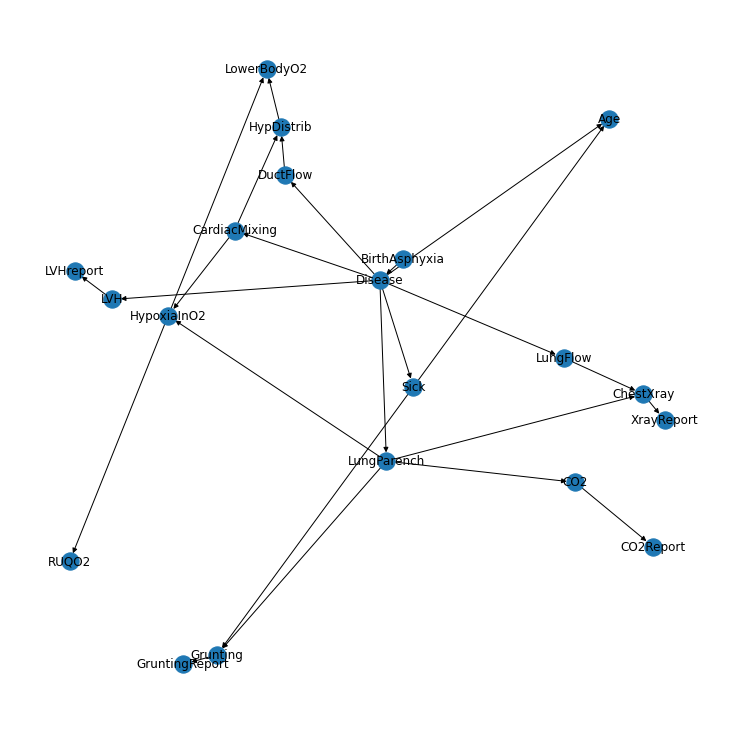

In [ ]:
G = nx.DiGraph(model['adjmat'])
#draw
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, arrows=True)
#save graph as directed
nx.write_gml(G, 'child.gml')

In [ ]:
# read graph
G = nx.read_gml('child.gml')

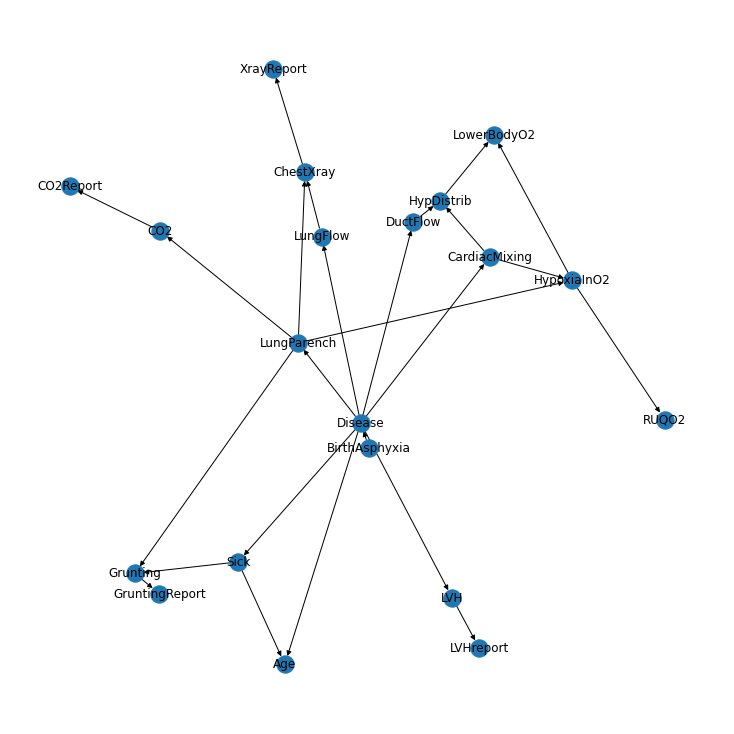

In [ ]:
# draw graph
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, arrows=True)